<a href="https://colab.research.google.com/github/KieuSonTung/Machine_Learning/blob/main/6.%20Decision%20Tree/6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 3], [2, 2], [3, 2], [4, 1], [4, 2], 
              [2, 6], [4, 6], [3, 7], [2, 8], [1, 9],
              [8, 6], [9, 7], [7, 9], [10, 6], [8, 9],
              [8, 4], [9, 1], [10, 3], [8, 3], [9, 3]])
y = np.ones(20)
y[:5] = 0

In [4]:
indx = np.where(X[:, 0] <= 5)
y[indx].shape

(10,)

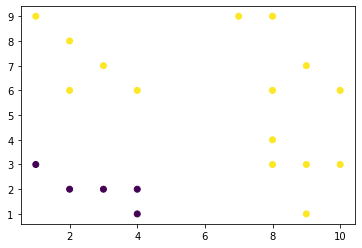

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
# search x1, x2 in range (0, 10) to find max gini index

In [7]:
def calculate_gini(n1, n2):
    if n1+n2 == 0: 
        return 1
    else: 
        return 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2

In [8]:
calculate_gini(5, 15)

0.375

In [9]:
# X1

g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0, 10, 0.5):

    # xét ngưỡng x <= i
    indx_below = np.where(X[:,0] <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(X[:,0] > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2 * y_below.shape[0] / y.shape[0] - g3 * y_above.shape[0] / y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

listOfKeys

[4.0, 4.5, 5.0, 5.5, 6.0, 6.5]

In [10]:
g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0, 10, 0.5):

    # xét ngưỡng x <= i
    indx_below = np.where(X[:,1] <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(X[:,1] > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2 * y_below.shape[0] / y.shape[0] - g3 * y_above.shape[0] / y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

listOfKeys
# print(G)

[2.0, 2.5]

In [11]:
salary = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
salary.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [12]:
salary.shape

(20, 3)

In [13]:
salary = salary.rename(columns={'Lương': 'x1', 'Thời gian làm việc': 'x2', 'Cho vay': 'y'})
salary.head()

,x1,x2,y
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


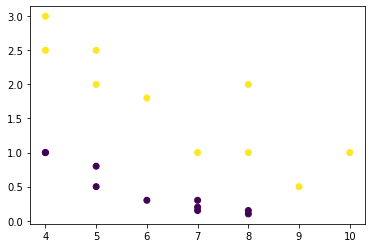

In [14]:
x1 = np.array(salary['x1'])
x2 = np.array(salary['x2'])
y = np.array(salary['y'])

plt.scatter(x1, x2, c=y)


In [15]:
# X1

g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0.0, 10, 0.5):

    # xét ngưỡng x <= i
    indx_below = np.where(x1 <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(x1 > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2 * y_below.shape[0] / y.shape[0] - g3 * y_above.shape[0] / y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

listOfKeys

[8.0, 8.5]

In [16]:
# X2

g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0.0, 10, 0.25):

    # xét ngưỡng x <= i
    indx_below = np.where(x2 <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(x2 > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2 * y_below.shape[0] / y.shape[0] - g3 * y_above.shape[0] / y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

listOfKeys

[1.0, 1.25, 1.5, 1.75]

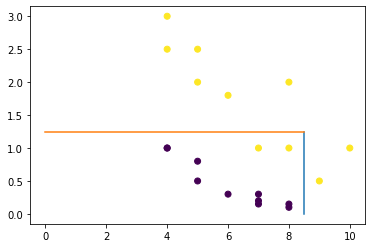

In [19]:
plt.scatter(x1, x2, c=y)
plt.plot([8.5, 8.5], [0, 1.25])
plt.plot([0, 8.5], [1.25, 1.25])